In [1]:
# Importing important libraries to perfom analysis in most efficient and easy way

import pandas as pd # EDA
import numpy as np # Array operations
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split


import sklearn.metrics as metrics  # To calculate the R Square , MSE & RMSE error

In [2]:
# importing the data using pandas library

df= pd.read_csv('/home/tensor/Downloads/Mini project1/Data_miniproject.csv')

# EDA (Exploratory Data Analysis)

In [3]:
df.head() # Representation of the first 5 rows of the dataset

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30,11.5200,4.02
1,290.0,24,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34,12.4440,5.134


In [4]:
# Shape of the dataframe
df.shape

(159, 6)

Total rows available is 159, hence every feature column must have 159 values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    object 
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    object 
 4   Height   158 non-null    float64
 5   Width    158 non-null    object 
dtypes: float64(3), object(3)
memory usage: 7.6+ KB


Here Weight, Length & Width has datatype as object though these are float64 type values

In [6]:
# Changing the datatype of the columns to float64

df['Weight'] = pd.to_numeric(df['Weight'],errors = 'coerce')
df['Length'] = pd.to_numeric(df['Length'],errors = 'coerce')
df['Width'] = pd.to_numeric(df['Width'],errors = 'coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   157 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   158 non-null    float64
 4   Height   158 non-null    float64
 5   Width    157 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


# Available features

Height – The height of the bag

Width – The width of the bag

Length – The length of the bag

Weight – The weight the bag can carry

Weight1 – Weight the bag can carry after expansion

 Now we need to detect the outliers first so it do not impact the mean/median values of perticular feature hence the further analysis.

Index(['Weight', 'Weight1', 'Length', 'Height', 'Width'], dtype='object')


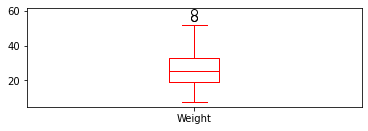

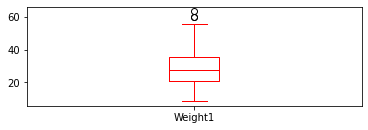

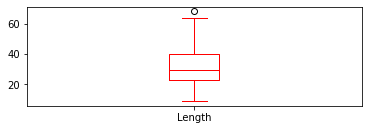

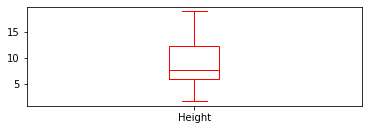

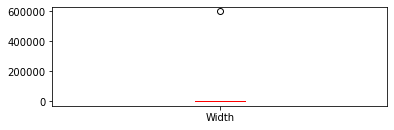

In [8]:
# Outlier Detection

column = df.columns
feature = column[1:]
print(feature)

for i in feature:
    plt.subplot(2,1,1)
    df[i].plot(kind = 'box', color='r')
    plt.show()
  

As per the boxplot shown above there are outliers available in our dataset. In the feature "Width" we have outlier point which could be an typo error as it way behyond the value range of the feature. Hence we need to remove it.


Other outliers are within the permissible range and can be left as it is.

In [9]:
# Outliers removal (IQR/Inter Quartile Range method)


i='Width'

Q1= df[i].quantile(0.25)
Q2= df[i].quantile(0.5) # This is the median or 50% of the boxplot 
Q3= df[i].quantile(0.75)
IQR = Q3-Q1
    
lower_limit = Q1 -1.5*IQR # Values below this will be considered as outiers
upper_limit = Q3 + 1.5*IQR # Values above/more than this will be considered as outliers


for j in range(len(df[i])): # Drop the row containing outlier value
    if df[i].iloc[j]< lower_limit or df[i].iloc[j]>upper_limit:
        df.drop([j],axis=0,inplace = True)
        break

for k in feature:            # replacing the null values with mean value
    df[k].fillna(df[k].mean(),inplace=True)    

            

In [10]:
df.isnull().sum()  # Counting the null value/empty values in our data

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
dtype: int64

Null values are present in the dataset. Since all the feature contains numeric values we can replace the null with the median values of the respective feature.

As per above details there are no null values present in dataframe now.

In [11]:
df.describe()

,Cost,Weight,Weight1,Length,Height,Width
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,390.720886,26.069231,28.215823,31.030573,8.928876,4.422621
std,345.989767,9.733870,10.448780,11.346936,4.272735,1.667513
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.025000,21.000000,23.125000,5.940600,3.398650
50%,272.500000,25.300000,27.150000,29.700000,7.733000,4.277050
75%,642.500000,32.650000,35.000000,39.575000,12.248700,5.577375
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


# Graphs & correlations

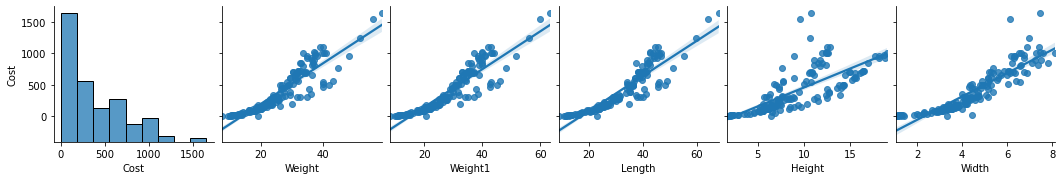

In [12]:
sns.pairplot(df, kind = 'reg', y_vars = 'Cost')  

As per the above plots between cost vs other feature it is evident that there may exist some linear relation.

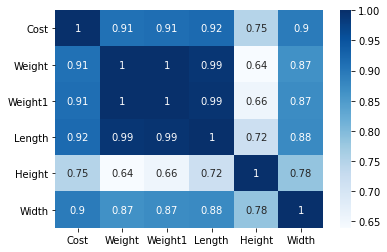

In [13]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')
plt.show()

Above correlation heatmap shows the strong correlation between Cost and other features. Hence all the feature available should be used to create the model.

# Model Building

 lets take the 5 variables as below for the multilinear regression.

In [14]:
x1 = df['Weight']
x2 = df['Weight1']
x3 = df['Length']
x4 = df['Height']
x5 = df['Width']

1.OLS Method

In [15]:
X = df.drop(['Cost'],axis=1)
Y = df['Cost']

X_train,X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.10)

In [16]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [17]:
print(model.coef_)
print(model.intercept_)

[ 12.83315397  26.3157045  -18.45308343  20.91855486  45.15958172]
-503.4334161847751


Eqaution of the Linear Regression will be 


Cost = 12.83*weight + 26.31*weight1 - 18.45*Length + 20.91*Height + 45.15*Width - 503.43

In [18]:
Y_predict = model.predict(X_test)

In [19]:
mse = metrics.mean_squared_error(Y_test, Y_predict)

print( 'MSE = ',mse)

rmse = np.sqrt(mse) # or mse**(0.5) 
print('RMSE = ', rmse)
r2 = metrics.r2_score(Y_test,Y_predict)
print('R Square error = ', r2)

MSE =  5642.460044049092
RMSE =  75.11631010672112
R Square error =  0.956483190907572


2. Gradient descent

In [20]:
n = float(len(x1)) # Total no of the data available for training

In [21]:
coef = np.zeros(7)  # Coefficient for the linear model, initial values =0
lr = 0.001 # learning rate

